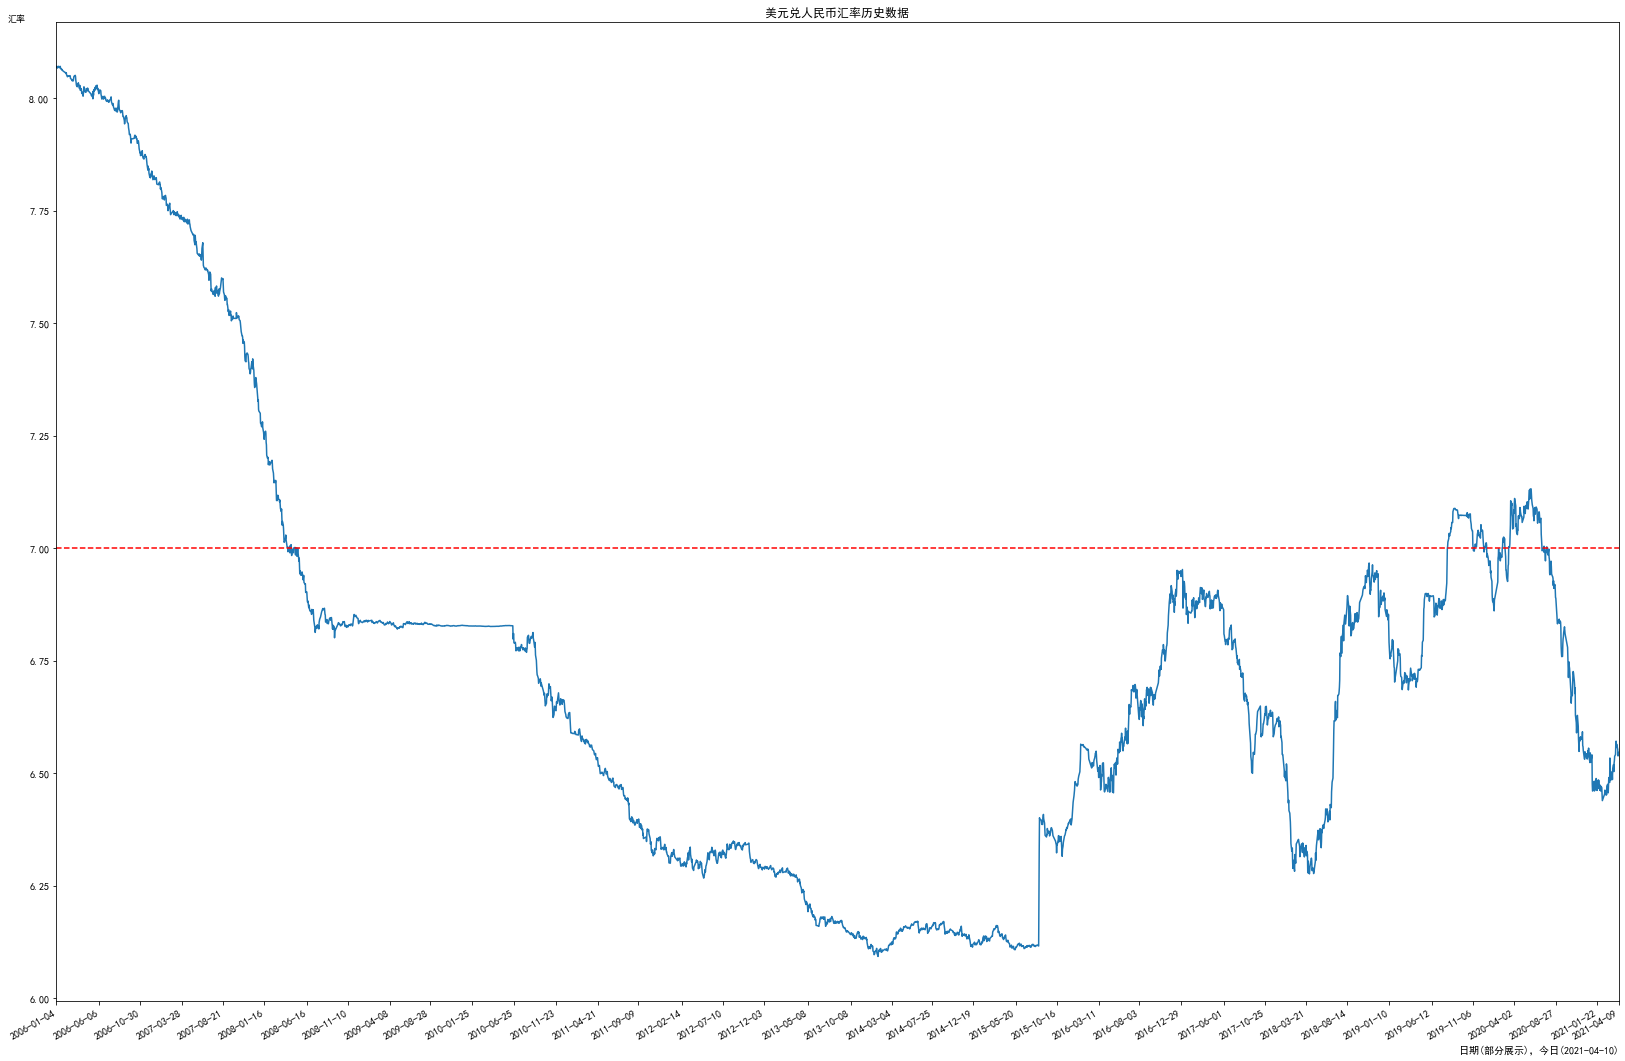

In [5]:
import requests
import json
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdate

plt.rcParams['font.sans-serif']=['SimHei']      
plt.rcParams['axes.unicode_minus'] = False  

baseUrl= "http://www.chinamoney.com.cn/ags/ms/cm-u-bk-ccpr/CcprHisNew?"

# currency="USD/CNY,EUR/CNY,100JPY/CNY,HKD/CNY,GBP/CNY,AUD/CNY,NZD/CNY,SGD/CNY,CHF/CNY,CAD/CNY,CNY/MYR,\
# CNY/RUB,CNY/ZAR,CNY/KRW,CNY/AED,CNY/SAR,CNY/HUF,CNY/PLN,CNY/DKK,CNY/SEK,CNY/NOK,CNY/TRY,CNY/MXN,CNY/THB"
currency = "USD/CNY"

initTime = "2006-01-04"   
initYear = 2006
initDate = 104
#自2006年1月4日起，中国人民银行授权中国外汇交易中心对外公布当日人民币对美元、欧元、日元和港币汇率中间价，
#作为当日银行间即期外汇市场(含OTC方式和撮合方式)以及银行柜台交易汇率的中间价。

now = time.time()
local_time = time.localtime(now)
today = time.strftime('%Y-%m-%d', local_time)
thisYear = time.strftime('%Y', local_time)
thisDate = time.strftime('%m%d', local_time)

startDate = ""
endDate = ""
pageSize = 300 #一年再多也不会超过300个交易日

records = []
if int(thisYear) == initYear or (int(thisYear)-1 == initYear and int(thisDate) < initDate) :
    # 不足一年
    startDate = initTime
    endDate = today
    url = baseUrl + "startDate=" + startDate + "&endDate=" + endDate + "&currency=" + currency + "&pageNum=1&pageSize=" + str(pageSize)
    res = requests.get(url)
    data = json.loads(res.text)
    records = records + data['records'][::-1]
else:
    ys = int(thisYear) - initYear
    ds = int(thisDate) - initDate
    if ds < 0:
        ys = ys - 1

    count = 0
    while ys > 0:    
        startDate = str(initYear+count) + "-01-04"
        endDate = str(initYear+count+1) + "-01-03"
        url = baseUrl + "startDate=" + startDate + "&endDate=" + endDate + "&currency=" + currency + "&pageNum=1&pageSize=" + str(pageSize)
        # print(url)
        res = requests.get(url)
        data = json.loads(res.text)
        records = records + data['records'][::-1]
        count = count + 1
        ys = ys - 1

    startDate = endDate[0:4] + "-01-04"
    endDate = today
    url = baseUrl + "startDate=" + startDate + "&endDate=" + endDate + "&currency=" + currency + "&pageNum=1&pageSize=" + str(pageSize)
    # print(url)    
    res = requests.get(url)
    data = json.loads(res.text)
    records = records + data['records'][::-1]

# print(records)

x = []
x0 = []
xx = []
y = []
for index,record in enumerate(records):
    # x.append(record['date'])
    timeStamp = int(time.mktime(time.strptime(record['date'], "%Y-%m-%d")))
    x.append(timeStamp)
    if index % 99 == 0 or index == len(records)-1:
        x0.append(timeStamp)
        xx.append(record['date'])
    y.append(float(record['values'][0]))

fig=plt.figure(figsize=(28,20))
plt.plot(x,y)   

plt.xlim(x[0],x[len(x)-1])

#x轴只显示部分标签
plt.xticks(list(set(x).difference(set(x0))),[])
plt.xticks(x0,xx,rotation=90)
fig.autofmt_xdate()

plt.title("美元兑人民币汇率历史数据")
plt.xlabel("日期(部分展示)，今日("+today+")", loc = "right")
plt.ylabel("汇率", loc = "top", rotation = 0, fontsize = 9)

plt.plot([x[0],x[len(x)-1]],[7,7],color='r',linestyle="--")   

plt.show()